# Exercise
Calculate the following for each of the columns given

- The mean of each x column
- The mean of each y column
- The correlation coefficient for every pair of columns: (x1, y1), (x2, y2), (x3, y3) and (x4, y4)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("/Users/ilhaam.ahmed/Projects/intro_data_analysis_with_pandas/Phase 2/csv files/Anscombe_quartet_data.csv")
anscombe = pd.DataFrame(file)

# The mean of each X column
x_mean = anscombe.filter(regex='^x').mean()
print("Mean of each x column:")
print(x_mean)

# The mean of each Y column
y_mean = anscombe.filter(regex='^y').mean()
print("Mean of each y column:")
print(y_mean)

# The correlation coefficient for every pair of columns
correlation_coeff_1 = anscombe['x1'].corr(anscombe['y1'])
correlation_coeff_2 = anscombe['x2'].corr(anscombe['y2'])
correlation_coeff_3 = anscombe['x3'].corr(anscombe['y3'])
correlation_coeff_4 = anscombe['x4'].corr(anscombe['y4'])
print("Correlation coefficient for each pair of columns:")
print(f"x1 and y1: {correlation_coeff_1}")
print(f"x2 and y2: {correlation_coeff_2}")
print(f"x3 and y3: {correlation_coeff_3}")
print(f"x4 and y4: {correlation_coeff_4}")

Mean of each x column:
x1    9.0
x2    9.0
x3    9.0
x4    9.0
dtype: float64
Mean of each y column:
y1    7.500909
y2    7.500909
y3    7.500000
y4    7.500909
dtype: float64
Correlation coefficient for each pair of columns:
x1 and y1: 0.81642051634484
x2 and y2: 0.8162365060002428
x3 and y3: 0.8162867394895984
x4 and y4: 0.8165214368885028


# Exercise 2
Plot each pair of columns on its own scatter graph. What do you notice now that you can "see" the data?

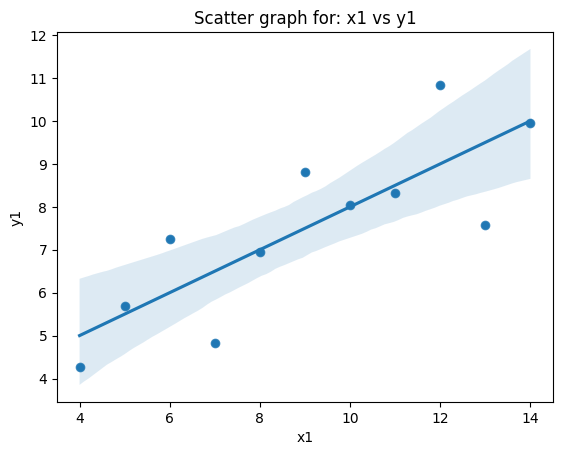

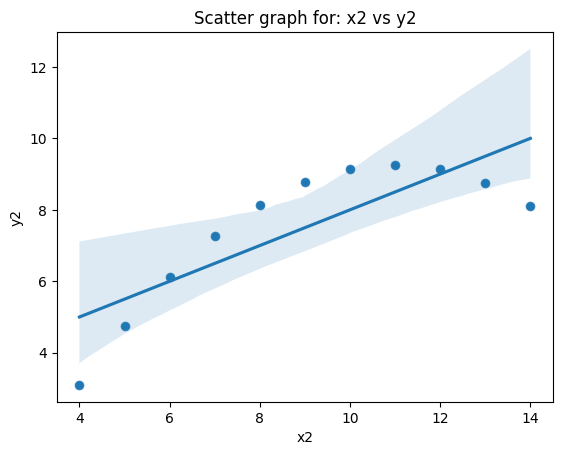

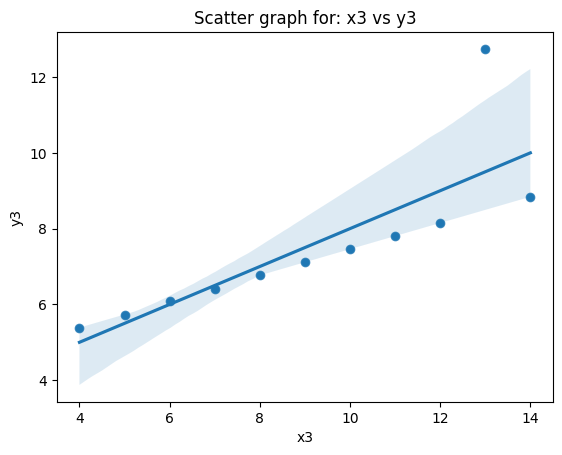

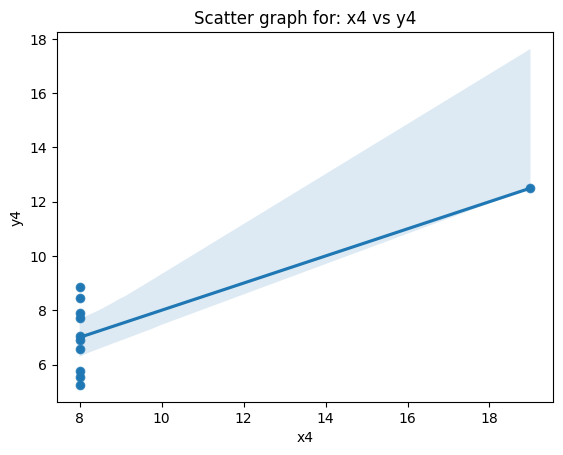

In [59]:
import seaborn as sns
pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

for x_columns, y_columns in pairs:
    sns.scatterplot(data=anscombe, x=x_columns, y=y_columns) #create a scatter plot
    sns.regplot(data=anscombe, x=x_columns, y=y_columns) #add a line of best fit
    plt.title(f"Scatter graph for: {x_columns} vs {y_columns}") #set title
    plt.show()

In [60]:
from ipywidgets import interact, Dropdown

@interact(
    set_num=Dropdown(
        options=["Anscombe set 1", "Anscombe set 2",
                "Anscombe set 3", "Anscombe set 4"],
        value="Anscombe set 1",
        description="Set number",
        continuous_update=False
    )
)
def show_an_anscombe(set_num):
    # print(set_num, set_num[-1])
    num = set_num[-1] #this takes the last character from the set_num parameter, to identify the dataset
    x = pd.Series(anscombe["x"+num]) 
    y = pd.Series(anscombe["y"+num])

    a, b = np.polyfit(x, y, 1) #This calculates the coefficients of a liner regression line that best fits the data. The 1 on the end specifies that we want a first defree polynomial, which is a straight line

    print("Mean of x"+num, x.mean())
    print("Mean of y"+num, y.mean())
    print("Correlation coefficient of x{} and y{}".format(num, num), x.corr(y))
    print("line of best fit given by y = {}x + {}".format( a, b))
    # fig, ax = plt.subplots()
    plt.scatter(x, y)
    plt.title("Anscombe x{} vs y{}".format(num, num))
    plt.plot(x, a*x + b)



interactive(children=(Dropdown(description='Set number', options=('Anscombe set 1', 'Anscombe set 2', 'Anscomb…

# Exercise 4
Draw a pie chart of the colours of stars. Display the top five colours and group the rest into "other".

In this exercise, the colour of the stars and the Color category are a prime example of the Nominal Statistical Data Type.

First make a table that shows how many lines of data we have for each color.

In [61]:
file = pd.read_csv("/Users/ilhaam.ahmed/Projects/intro_data_analysis_with_pandas/Phase 2/csv files/Stars.csv")
stars = pd.DataFrame(file)

color_count = stars['Color'].value_counts().reset_index()
color_count.columns = ['Color', 'Count']
print(color_count)

                 Color  Count
0                  Red    112
1                 Blue     56
2           Blue-white     41
3                White     10
4         yellow-white      8
5      Yellowish White      3
6            Yellowish      3
7              Whitish      2
8               Orange      2
9   Pale yellow orange      1
10        White-Yellow      1
11          Orange-Red      1


Now use the above to make a pie chart for the top five and group the rest into other.

In [68]:
top_colors = color_count.head()
remaining_count = pd.DataFrame({'Color': ['Other'], 'Count': [color_count['Count'].sum() - top_colors['Count'].sum()]})
top_colors = pd.concat([top_colors, remaining_count])
top_colors

,Color,Count
0,Red,112
1,Blue,56
2,Blue-white,41
3,White,10
4,yellow-white,8
0,Other,13


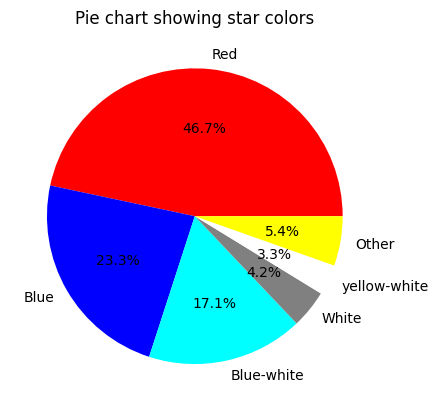

In [76]:
category_colors = ['red', 'blue', 'cyan', 'gray', 'white', 'yellow']
plt.pie(top_colors['Count'], labels=top_colors['Color'], autopct='%1.1f%%', colors=category_colors)
plt.title("Pie chart showing star colors")
plt.show()